## MAST Analysis (requires log-transformed data)

In [9]:
setwd('/Users/eliash/Desktop/multiomics/[AK023] cKit-low HSCs do better')

In [10]:
getwd()

[1] "/Users/eliash/Desktop/multiomics/[AK023] cKit-low HSCs do better"

In [2]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MAST")

Bioconductor version '3.20' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'MAST'

installing the source package ‘MAST’




In [3]:
install.packages("data.table", dependencies=TRUE)

also installing the dependencies ‘litedown’, ‘xts’, ‘markdown’





The downloaded binary packages are in
	/var/folders/rj/b218xr0s4qvdw1k7xjkdq21125c853/T//RtmpkCYBhx/downloaded_packages


In [5]:
BiocManager::install(c("scuttle", "scran"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'scuttle'”
Installing package(s) 'scran'

also installing the dependencies ‘ScaledMatrix’, ‘rsvd’, ‘BiocSingular’, ‘bluster’, ‘metapod’





The downloaded binary packages are in
	/var/folders/rj/b218xr0s4qvdw1k7xjkdq21125c853/T//RtmpkCYBhx/downloaded_packages


In [1]:
library(MAST)
library(data.table)
library(scran)
library(scuttle)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
library(reticulate)
#use_condaenv("R-lisi", required = TRUE)

In [16]:
BiocManager::install("zellkonverter")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'zellkonverter'

also installing the dependencies ‘dir.expiry’, ‘basilisk.utils’, ‘basilisk’





The downloaded binary packages are in
	/var/folders/rj/b218xr0s4qvdw1k7xjkdq21125c853/T//RtmpkCYBhx/downloaded_packages


In [30]:
library(zellkonverter)

In [32]:
sceV2 <- readH5AD("sce_v2.h5ad")

In [33]:
sceV2

class: SingleCellExperiment 
dim: 20531 6136 
metadata(0):
assays(1): X
rownames(20531): Xkr4 Rp1 ... CAAA01147332.1 AC149090.1
rowData names(0):
colnames(6136): TATGCATCAAACTGTT-1@HSC_young_1570
  GACGCCTAGTATTGCA-1@HSC_young_1570 ...
  ATCAAGCTCTCGCCCA-1@HSC_young_1536 GCAGGTGAGGCCTTAG-1@HSC_young_1536
colData names(1): Cluster_label
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [34]:
counts(sceV2) <- assay(sceV2, "X"); 
print("Finished Setup")

[1] "Finished Setup"


In [35]:
assay(sceV2)

,TATGCATCAAACTGTT-1@HSC_young_1570,GACGCCTAGTATTGCA-1@HSC_young_1570,CCGTTACTCTGTAAGC-1@HSC_young_1536,ACCAGGACAGCATTAT-1@HSC_young_1536,TTCGTTAGTGATGGCT-1@HSC_young_1536,AGGTAACCAATTTGGT-1@HSC_young_1536,GGGCATTGTGATGATT-1@HSC_young_1536,GGCAAATCAATATACC-1@HSC_young_1536,CTAAGTCAGCGCCTTT-1@HSC_young_1536,TTGTTGTTCTAACTGA-1@HSC_young_1570,⋯,CGGACCTAGCTTCTCA-1@HSC_young_1536,TAATCACCAATACTGT-1@HSC_young_1570,CAATGCCCAATAATGG-1@HSC_young_1570,CGGCTCACATTGCGGT-1@HSC_young_1536,AGAAACCCAGGATAAC-1@HSC_young_1536,AGTCGCATCATTCATC-1@HSC_young_1536,GACATAGAGTAAGGGC-1@HSC_young_1536,ATTCCGGAGGCAAGTA-1@HSC_young_1536,ATCAAGCTCTCGCCCA-1@HSC_young_1536,GCAGGTGAGGCCTTAG-1@HSC_young_1536
Xkr4,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rp1,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox17,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gm37323,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.0000000,0.0000000,1.0954225,0.000000,0.7383777,1.2835979,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,1.042112,0.930813,0.000000,0.000000,0.000000,0.000000,0.000000,0.782183
Lypla1,0.0000000,0.4733959,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,1.3791002,0.000000,1.042112,1.724499,0.000000,0.000000,1.202133,0.000000,0.000000,0.782183
Tcea1,1.6322216,1.7653290,1.6056089,1.194376,1.4533954,0.8349946,1.184048,0.9151821,0.000000,0.883872,⋯,0.0000000,1.012190,0.000000,0.930813,1.988474,0.000000,0.000000,0.000000,0.000000,0.000000
Rgs20,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Atp6v1h,0.8636248,0.7933877,0.0000000,1.194376,0.0000000,1.8276423,0.000000,1.3849084,0.000000,0.883872,⋯,0.0000000,0.000000,1.541244,0.000000,0.000000,1.015210,1.732436,0.000000,2.523684,0.782183
Rb1cc1,2.2225082,1.5331228,0.0000000,0.000000,1.1584761,0.8349946,1.711118,1.7032361,1.785537,1.660275,⋯,1.3791002,1.833359,1.541244,0.000000,0.815752,1.837343,1.202133,2.336369,0.000000,1.748323


In [36]:
colData(sceV2)

DataFrame with 6136 rows and 1 column
                                  Cluster_label
                                       <factor>
TATGCATCAAACTGTT-1@HSC_young_1570      q-HSC   
GACGCCTAGTATTGCA-1@HSC_young_1570      MLin-HSC
CCGTTACTCTGTAAGC-1@HSC_young_1536      MLin-HSC
ACCAGGACAGCATTAT-1@HSC_young_1536      Mgk-HSC 
TTCGTTAGTGATGGCT-1@HSC_young_1536      Mgk-HSC 
...                                         ...
AGTCGCATCATTCATC-1@HSC_young_1536       Int-HSC
GACATAGAGTAAGGGC-1@HSC_young_1536       Mgk-HSC
ATTCCGGAGGCAAGTA-1@HSC_young_1536       Mgk-HSC
ATCAAGCTCTCGCCCA-1@HSC_young_1536       q-HSC  
GCAGGTGAGGCCTTAG-1@HSC_young_1536       Mgk-HSC

### Illustrating for Young Cluster MLin vs qHSC

In [37]:
# For illustration, we will show how to run MAST to compare cluster HSC3 with specific cluster:

# identify cells belonging to cluster HSC3:
id_cells_HSC3 <- which(colData(sceV2)$Cluster_label == 'MLin-HSC')

# identify cells belonging to cluster HSC2: (i.e. not in Cluster 0):
id_cells_HSC1 <- which(colData(sceV2)$Cluster_label == 'q-HSC')

# Check the length of the two sets
print(length(id_cells_HSC3))
print(length(id_cells_HSC1))

# Create two dataframes: one with cells from C0 and one with rest of the cells
df1 <- t(data.frame(counts(sceV2)[, id_cells_HSC3])) # transpose because in sce genes are rows
df2 <- t(data.frame(counts(sceV2)[, id_cells_HSC1])) # transpose because in sce genes are rows

# We will use the function provided:
source("/Users/eliash/Downloads/run_MAST.r")

# Syntax: %R pairwise_de(dataframe1, dataframe2, 'output_filename', 'output_folder')
# The output will be automatically saved as a csv file in the output_folder with output_filename
pairwise_de(df1, df2, 'Cluster_MLinHSC_vs_qHSC_young_060125', '/Users/eliash/Desktop/multiomics/[AK023] cKit-low HSCs do better/')

[1] 676
[1] 2456


Assuming data assay in position 1, with name et is log-transformed.


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



In [38]:
diff_expr_file <- '/Users/eliash/Desktop/multiomics/[AK023] cKit-low HSCs do better/Cluster_MLinHSC_vs_qHSC_young_060125.csv'

In [37]:
if (!requireNamespace('BiocManager', quietly = TRUE))
    install.packages('BiocManager')

  BiocManager::install('EnhancedVolcano')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'EnhancedVolcano'




The downloaded binary packages are in
	/var/folders/rj/b218xr0s4qvdw1k7xjkdq21125c853/T//RtmpkCYBhx/downloaded_packages


In [39]:
library(EnhancedVolcano)

Loading required package: ggrepel



In [40]:
HSC3vsHSC1<- read.csv("/Users/eliash/Desktop/multiomics/[AK023] cKit-low HSCs do better/Cluster_MLinHSC_vs_qHSC_young_060125.csv", header = TRUE)

In [41]:
HSC3vsHSC1

X,primerid,Pr..Chisq.,coef,ci.hi,ci.lo,fdr
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cdk6,0.000000e+00,1.8665578,1.9340579,1.7990577,0.000000e+00
2,Pola1,0.000000e+00,1.6687557,1.7345187,1.6029928,0.000000e+00
3,Mecom,7.472531e-305,-1.2700626,-1.1922900,-1.3478352,5.113951e-301
4,Hlf,2.809370e-242,-1.6365672,-1.5541764,-1.7189579,1.441980e-238
5,Pdcd4,7.448877e-235,1.2017763,1.2751886,1.1283641,3.058658e-231
6,Mir99ahg,1.803223e-231,-1.5879005,-1.5009036,-1.6748973,6.170329e-228
7,Zeb2,5.728267e-213,1.2915326,1.3638244,1.2192408,1.680101e-209
8,Atad2,3.101000e-204,1.2346225,1.3077390,1.1615060,7.958329e-201
9,Zbtb20,2.604033e-202,-0.7836094,-0.7356724,-0.8315463,5.940379e-199


## Figure 1A

In [42]:
HSC3vsHSC1$log.fdr <- -log10(HSC3vsHSC1$fdr)

In [43]:
HSC3vsHSC1$Significant <- ifelse(
  HSC3vsHSC1$log.fdr > 10 & HSC3vsHSC1$coef > 0.25, "HSC3",
  ifelse(HSC3vsHSC1$log.fdr > 10 & HSC3vsHSC1$coef < -0.25, "HSC1", "Not Sig")
)

In [44]:
genes_highlight <- c('Kit','Cd244a','Ly9', 'Pdzk1ip1','Hlf', 'Neo1', 'Hoxb5',  'Procr')

Warning message:
“Removed 4206 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


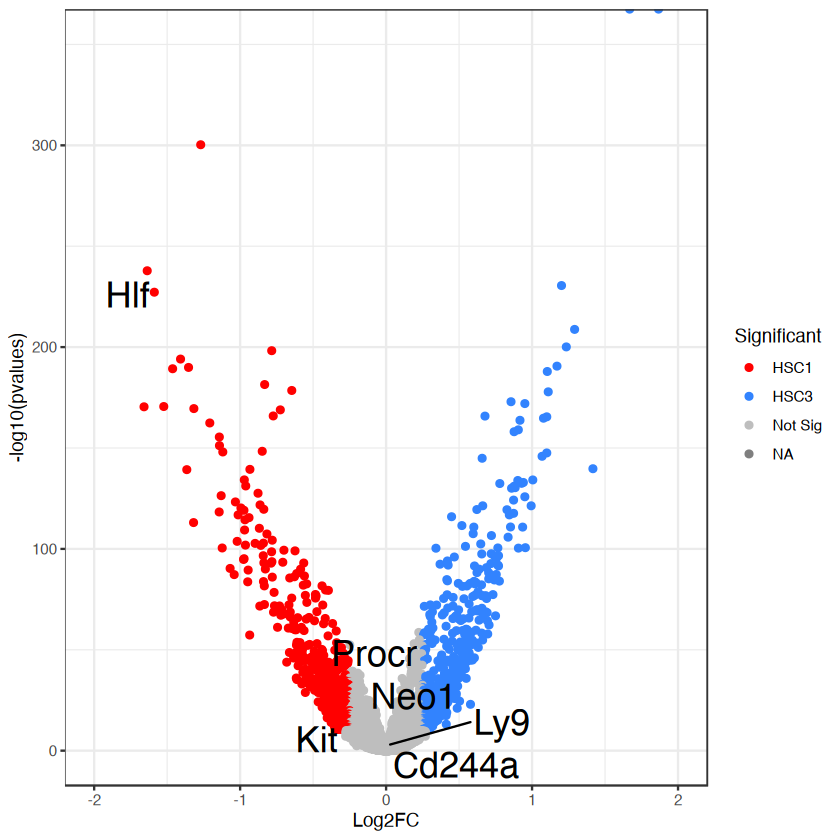

In [47]:
p1<- ggplot(HSC3vsHSC1, aes(x = coef, y = log.fdr),) + geom_point(aes(color = Significant)) + scale_color_manual(values = c( "#FF0000", "#3283FE", "gray")) + 
scale_x_continuous(name="Log2FC", limits=c(-2, 2))+
scale_y_continuous(name = "-log10(pvalues)", limits=c(0, 350)) +
geom_text_repel (data = subset(HSC3vsHSC1, primerid %in% genes_highlight), aes(label = primerid),size = 7.5, fontface = "bold.italic", box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) +
theme_bw()
p1

## Figure S2K 

In [57]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("miloR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'miloR'

also installing the dependencies ‘tweenr’, ‘ggforce’, ‘tidygraph’, ‘graphlayouts’, ‘ggraph’, ‘RcppML’





The downloaded binary packages are in
	/var/folders/rj/b218xr0s4qvdw1k7xjkdq21125c853/T//RtmpkCYBhx/downloaded_packages


In [64]:
BiocManager::install("scater")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'scater'

installing the source package ‘scater’




In [4]:
library(miloR)
library(igraph)
library(Seurat)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)
library(scuttle)

Loading required package: edgeR

Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA



Attaching package: ‘edgeR’


The following object is masked from ‘package:SingleCellExperiment’:

    cpm



Attaching package: ‘igraph’


The following object is masked from ‘package:miloR’:

    graph


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘sp’


The following object is masked from ‘package:IRanges’:

    %over%


‘Seurat

In [11]:
adata_no_knn <- readH5AD("adata_no_knn.h5ad")

In [12]:
adata_no_knn

class: SingleCellExperiment 
dim: 21665 12347 
metadata(32): ageHSCcluster_colors age_colors ... scrublet umap
assays(4): X norm_counts norm_log raw_data
rownames(21665): Xkr4 Gm37381 ... CAAA01147332.1 AC149090.1
rowData names(15): n_cells_by_counts mean_counts ... dispersions_norm
  varm
colnames(12347): GAAACTGAGTACCGCA-1@HSC-1536_Young
  TGTCATAAGCGGTTAT-1@HSC-1536_Old ... AAGTTTGTCAATGTCA-1@HSC-1570_Young
  GATTCAGGTCAACAAT-1@HSC-1536_Old
colData names(62): sample age ... age_kit_10 batch
reducedDimNames(4): X_harmony X_pca X_pca_harmony X_umap
mainExpName: NULL
altExpNames(0):

In [13]:
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 21665 12347 
metadata(32): ageHSCcluster_colors age_colors ... scrublet umap
assays(4): X norm_counts norm_log raw_data
rownames(21665): Xkr4 Gm37381 ... CAAA01147332.1 AC149090.1
rowData names(15): n_cells_by_counts mean_counts ... dispersions_norm
  varm
colnames(12347): GAAACTGAGTACCGCA-1@HSC-1536_Young
  TGTCATAAGCGGTTAT-1@HSC-1536_Old ... AAGTTTGTCAATGTCA-1@HSC-1570_Young
  GATTCAGGTCAACAAT-1@HSC-1536_Old
colData names(62): sample age ... age_kit_10 batch
reducedDimNames(4): X_harmony X_pca X_pca_harmony X_umap
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

In [14]:
colData(milo)

DataFrame with 12347 rows and 62 columns
                                          sample      age n_genes_by_counts
                                        <factor> <factor>         <integer>
GAAACTGAGTACCGCA-1@HSC-1536_Young HSC-1536_Young    young              3576
TGTCATAAGCGGTTAT-1@HSC-1536_Old   HSC-1536_Old      old                2211
TGTTTGTTCGAAGTGA-1@HSC-1536_Young HSC-1536_Young    young              5219
TACAATGTCATTCATC-1@HSC-1536_Young HSC-1536_Young    young              1781
ACTAACTCAGGAACAT-1@HSC-1536_Old   HSC-1536_Old      old                2654
...                                          ...      ...               ...
CTTAACAAGGTGCTGC-1@HSC-1536_Young HSC-1536_Young    young              2147
TTTGTGTTCACGCGGT-1@HSC-1570_Old   HSC-1570_Old      old                2903
GTTCTTGTCTTAGGGT-1@HSC-1536_Young HSC-1536_Young    young              3819
AAGTTTGTCAATGTCA-1@HSC-1570_Young HSC-1570_Young    young              4999
GATTCAGGTCAACAAT-1@HSC-1536_Old   HSC-1536_Old 

In [15]:
design <- data.frame(colData(milo))[,c("sample", "age", "batch")]
design$batch <- as.factor(design$batch)
design <- distinct(design)
rownames(design) <- design$sample
design

,sample,age,batch
,<fct>,<fct>,<fct>
HSC-1536_Young,HSC-1536_Young,young,batch1
HSC-1536_Old,HSC-1536_Old,old,batch1
HSC-1570_Old,HSC-1570_Old,old,batch2
HSC-1570_Young,HSC-1570_Young,young,batch2


In [17]:
reducedDim(milo, "PCA") <- reducedDim(milo, "X_pca")

In [18]:
milo <- buildGraph(milo, k=35, d=15)

Constructing kNN graph with k:35



Checking valid object

Running refined sampling with reduced_dim



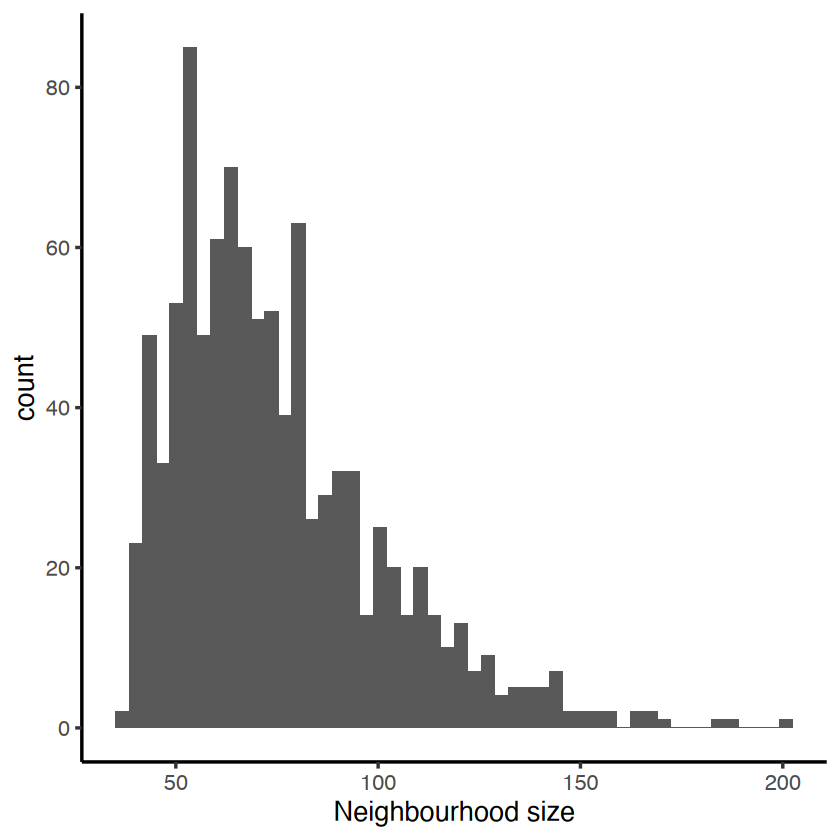

In [19]:
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.1, k = 35, d=15, refined = TRUE)
plotNhoodSizeHist(milo)

In [21]:
 ## Count cells in neighbourhoods
 milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="sample")
 head(nhoodCounts(milo))

 ## for spatial FDR correction
 milo <- calcNhoodDistance(milo, d=15, reduced.dim = "X_pca")
 
 ## Test for differential abundance
 DA_results <- testNhoods(milo, design = ~ age, design.df = design, reduced.dim = "X_pca")

Checking meta.data validity

Counting cells in neighbourhoods



6 x 4 sparse Matrix of class "dgCMatrix"
  HSC-1536_Old HSC-1570_Old HSC-1570_Young HSC-1536_Young
1            1            1             17             45
2            .           75              .              .
3            .            .             57             11
4            .            .             71             42
5            .            2             34             20
6            .            .             24             36

Warning message in testNhoods(milo, design = ~age, design.df = design, reduced.dim = "X_pca"):
“Sample names in design matrix and nhood counts are not matched. Reordering”
Using TMM normalisation

Running with model contrasts

Performing spatial FDR correction with k-distance weighting



In [22]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0245495,8.590218,0.4256535,0.51420465,0.5792791,1,0.5720501
2,-11.6402902,12.250091,1.1505789,0.28355780,0.3758455,2,0.3667075
3,8.2038683,9.024757,2.5044083,0.11368670,0.3758455,3,0.3667075
4,8.6674543,9.433830,1.2742749,0.25910202,0.3758455,4,0.3667075
5,1.2747247,8.907731,0.2942601,0.58756404,0.6458670,5,0.6395052
6,7.3687124,8.336232,5.7424576,0.01665122,0.1795619,6,0.1688558
7,3.3989011,9.316694,0.6013337,0.43816157,0.5091458,7,0.5008766
8,-11.4775465,12.087622,1.1495791,0.28376702,0.3758455,8,0.3667075
9,7.2125954,8.200904,5.2776903,0.02170353,0.1795619,9,0.1688558


In [23]:
DA_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,7.368712,8.336232,5.742458,0.01665122,0.1795619,6,0.1688558
9,7.212595,8.200904,5.277690,0.02170353,0.1795619,9,0.1688558
22,7.260154,8.216602,5.441100,0.01976731,0.1795619,22,0.1688558
31,7.564707,8.482043,6.012163,0.01429281,0.1795619,31,0.1688558
32,7.194532,8.184410,5.212752,0.02252662,0.1795619,32,0.1688558
33,7.180411,8.173739,5.163618,0.02317084,0.1795619,33,0.1688558


## Figure S2K 

In [24]:
milo <- buildNhoodGraph(milo)

Adding nhood effect sizes to neighbourhood graph attributes



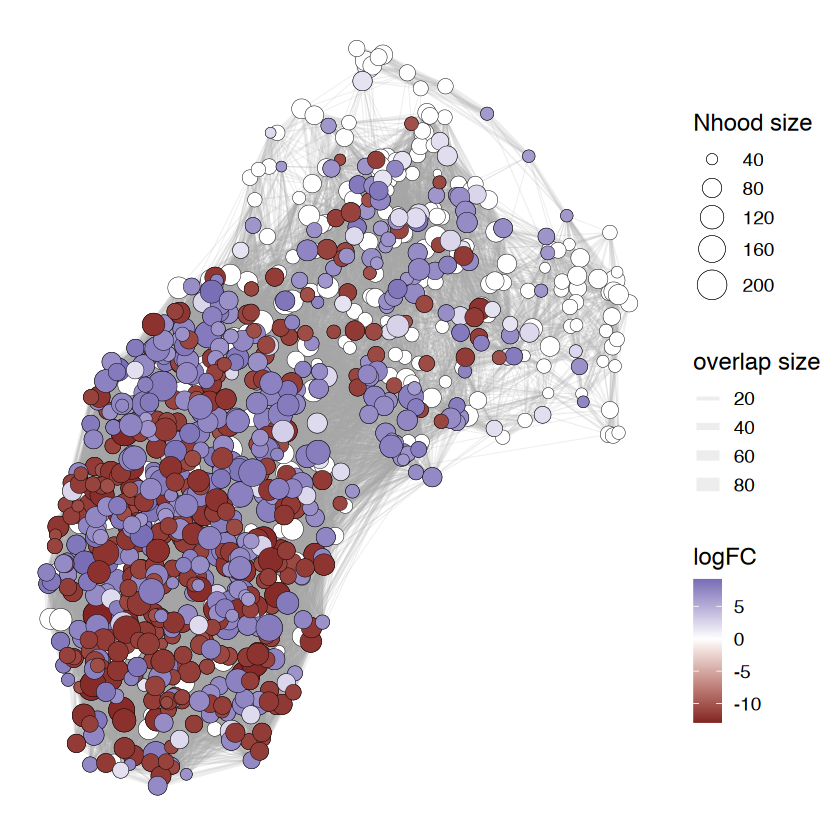

In [27]:
p<- plotNhoodGraphDA(milo, DA_results, alpha=0.375, res_column = 'logFC', 
                 layout="X_umap", size_range = c(2, 8), node_stroke =0.15)
p

## Figure S2L

In [28]:
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "cell_type_subset")
head(DA_results)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,cell_type_subset,cell_type_subset_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1.024550,8.590218,0.4256535,0.51420465,0.5792791,1,0.5720501,Int-HSC,0.8593750
2,-11.640290,12.250091,1.1505789,0.28355780,0.3758455,2,0.3667075,Mgk-HSC,0.9066667
3,8.203868,9.024757,2.5044083,0.11368670,0.3758455,3,0.3667075,Mgk-HSC,0.9852941
4,8.667454,9.433830,1.2742749,0.25910202,0.3758455,4,0.3667075,Mgk-HSC,0.6902655
5,1.274725,8.907731,0.2942601,0.58756404,0.6458670,5,0.6395052,MLin-HSC,0.9285714
6,7.368712,8.336232,5.7424576,0.01665122,0.1795619,6,0.1688558,q-HSC,0.7500000


Converting group_by to factor...



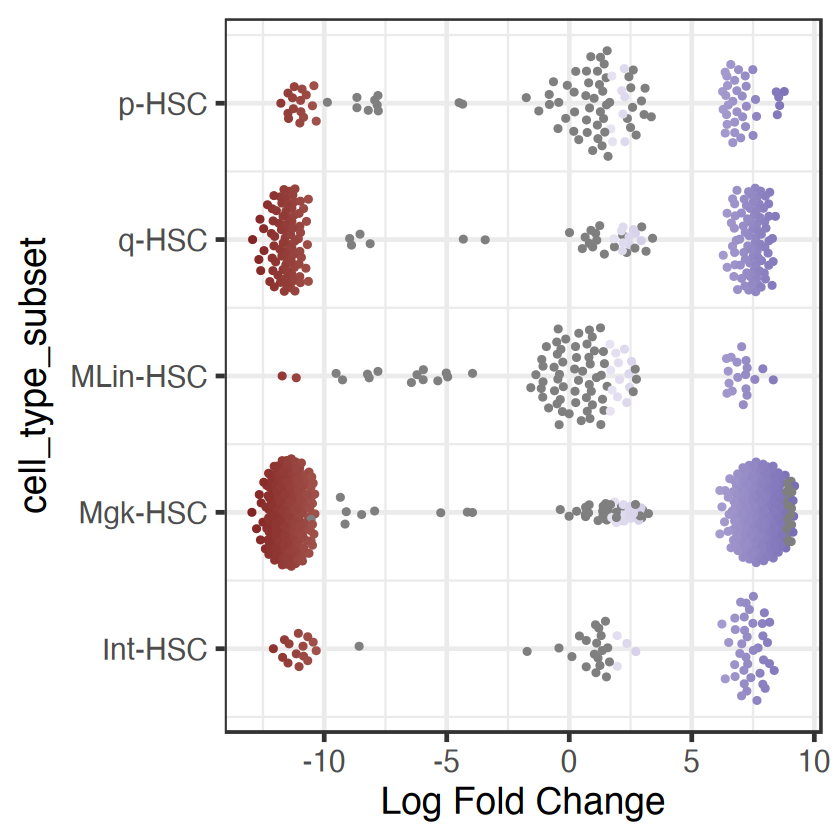

In [29]:
p2<- plotDAbeeswarm(DA_results, group.by = "cell_type_subset", alpha = 0.375)
#ggsave(paste0(outbase, 'plotDAbeeswarm_subset_091523.pdf'), p2, dpi = 300)
p2